In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import matplotlib.gridspec as gs
import math

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/hypothesis-testing/world ladder score 2021.xlsx
/kaggle/input/hypothesis-testing/world life ladder 2019.xlsx
/kaggle/input/world-happ/world-happiness-report-2005-2021 (1).xlsx


In [2]:
df_1 = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report-2021.csv")
df_2 = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
df_1.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [4]:
df_2.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


# Data Cleaning

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

Df_1 has no missing values. Data is clean.

In [6]:
df_2.isnull().sum().sort_values(ascending=False)

Perceptions of corruption           110
Generosity                           89
Healthy life expectancy at birth     55
Log GDP per capita                   36
Freedom to make life choices         32
Positive affect                      22
Negative affect                      16
Social support                       13
Country name                          0
year                                  0
Life Ladder                           0
dtype: int64

Missing Value Columns

1. Log GDP per capita 

2. Social Support

3. Healthy life expectancy at birth

4. Freedom to make life choices

5. Generosity

6. Perceptions of corruption 



In [7]:
df_2.drop(["Positive affect","Negative affect"],axis=1,inplace=True) 


In [8]:
df_2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [9]:
# for col in df_2:
#     print(f'{col} has {df_2[col].unique()} unique values')

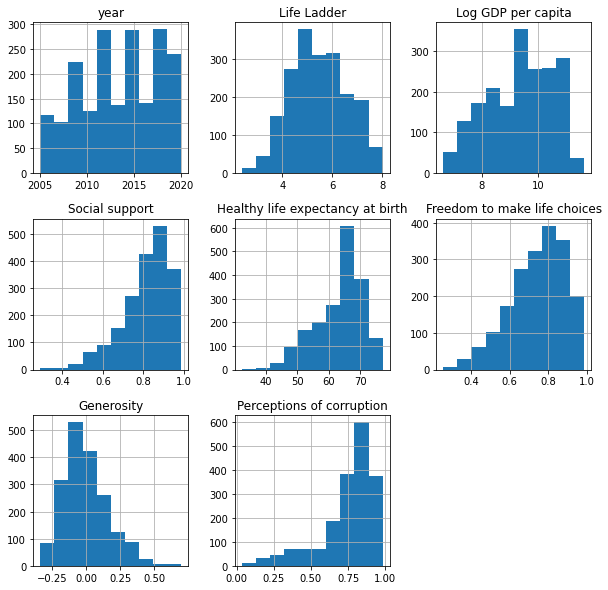

In [10]:
hist_before = df_2.hist(figsize=(10,10))

In [11]:
df_2_copy = df_2.copy(deep = True)

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
cols = ['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
       'Generosity','Perceptions of corruption']
for i in cols:
    df_2_copy[i] = mice_imputer.fit_transform(df_2_copy[[i]])

In [13]:
df_2_copy.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
dtype: int64

In [14]:
df_2_copy.to_csv('./imputed_world_happiness.csv')

**Data Cleaned!**

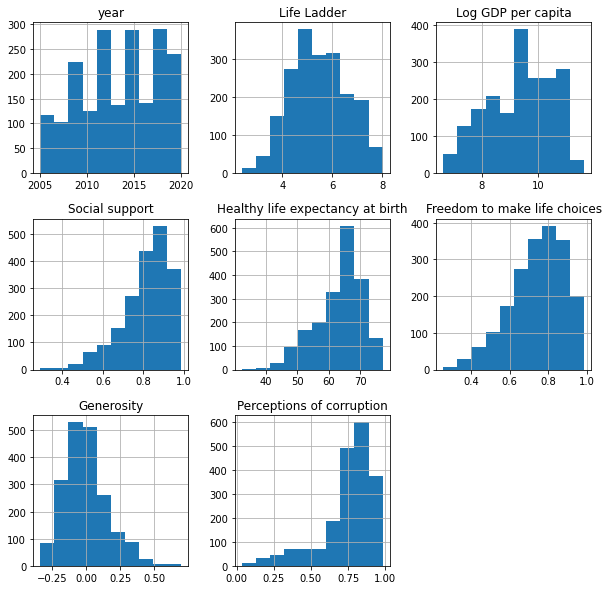

In [15]:
hist_after = df_2_copy.hist(figsize=(10,10))

# Descriptive Statistics

### Top Best and Worst Performing Countries

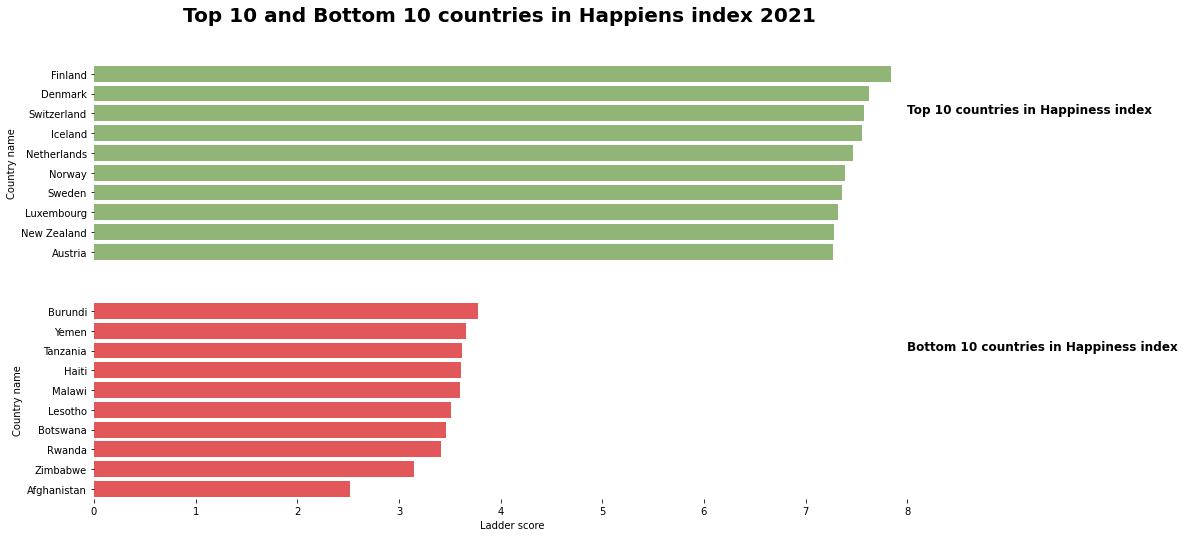

In [16]:
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]

fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 10 and Bottom 10 countries in Happiens index 2021", weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_10=df_1.head(10)
bot_10= df_1.tail(10)
ax1=sns.barplot(data=top_10, x=top_10['Ladder score'],y=top_10['Country name'], color=color[4])
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 10 countries in Happiness index",xy=(8,2), weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_10, x=bot_10['Ladder score'],y=bot_10['Country name'], color=color[0])
ax2.annotate("Bottom 10 countries in Happiness index",xy=(8,2), weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

## Measures of Centrality

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

## Measures of Centrality

In [18]:
cols_2 = ['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices',
       'Generosity','Perceptions of corruption']
for i in cols_2:
    print(f'Mean for {i} is {df_1[i].mean()}')
print("")
for i in cols_2:
    print(f'Median for {i} is {df_1[i].median()}')


Mean for Ladder score is 5.532838926174494
Mean for Logged GDP per capita is 9.432208053691273
Mean for Social support is 0.8147449664429529
Mean for Healthy life expectancy is 64.99279865771811
Mean for Freedom to make life choices is 0.7915973154362415
Mean for Generosity is -0.015134228187919468
Mean for Perceptions of corruption is 0.7274496644295301

Median for Ladder score is 5.534
Median for Logged GDP per capita is 9.569
Median for Social support is 0.832
Median for Healthy life expectancy is 66.603
Median for Freedom to make life choices is 0.804
Median for Generosity is -0.036
Median for Perceptions of corruption is 0.781


## Measures of Variability

In [19]:
import statistics

In [20]:
for i in cols_2:
    print(f'Standard Deviation for {i} is {statistics.stdev(df_1[i])}')
print("")
for i in cols_2:
    print(f'Variance for {i} is {statistics.variance(df_1[i])}')


Standard Deviation for Ladder score is 1.073923565823598
Standard Deviation for Logged GDP per capita is 1.1586014476640767
Standard Deviation for Social support is 0.11488902720653997
Standard Deviation for Healthy life expectancy is 6.76204309040431
Standard Deviation for Freedom to make life choices is 0.11333178506605257
Standard Deviation for Generosity is 0.15065670021779698
Standard Deviation for Perceptions of corruption is 0.17922631911280348

Variance for Ladder score is 1.1533118252312715
Variance for Logged GDP per capita is 1.3423573145292944
Variance for Social support is 0.013199488572465083
Variance for Healthy life expectancy is 45.72522675648467
Variance for Freedom to make life choices is 0.012844093506257936
Variance for Generosity is 0.022697441320515148
Variance for Perceptions of corruption is 0.03212207346272447


**Descriptive Statistics by Country**

In [23]:
def des_stat_by_country(country_name):
    country = df_2_copy[df_2_copy["Country name"] == country_name]
    print(f'The mean for {country_name} is {country.mean()}')
    print("")
    print(f'The median for {country_name} is {country.median()}')
    print("")
    cols_2 = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
       'Generosity','Perceptions of corruption']
    for i in cols_2:
        print(f'The standard deviation of {i} for {country_name} is {statistics.stdev(country[i])}')
    print("---------------------------------------------------------------------------------------")
    for i in cols_2:
        print(f'The variance of {i} for {country_name} is {statistics.variance(country[i])}')
    


In [24]:
des_stat_by_country('Finland')

The mean for Finland is year                                2013.769231
Life Ladder                            7.597154
Log GDP per capita                    10.749923
Social support                         0.949000
Healthy life expectancy at birth      71.180000
Freedom to make life choices           0.939692
Generosity                             0.003077
Perceptions of corruption              0.249000
dtype: float64

The median for Finland is year                                2014.000
Life Ladder                            7.660
Log GDP per capita                    10.745
Social support                         0.951
Healthy life expectancy at birth      71.360
Freedom to make life choices           0.936
Generosity                            -0.001
Perceptions of corruption              0.223
dtype: float64

The standard deviation of Life Ladder for Finland is 0.19593104490859628
The standard deviation of Log GDP per capita for Finland is 0.027614795365472494
The standard deviati

# Inferential Statistics

### Hypothesis testing: Covid-19 had no effect on world happiness rankings despite the varying number of deaths

In [25]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 4.4 MB/s eta 0:00:01


In [26]:
df_3 = pd.read_excel("../input/hypothesis-testing/world life ladder 2019.xlsx")
df_4 = pd.read_excel("../input/hypothesis-testing/world ladder score 2021.xlsx")

In [28]:
df_3.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583


In [29]:
df_3.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
dtype: int64

In [30]:
df_4.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
dtype: int64

In [33]:
LL_2019 = df_3['Life Ladder'].values

In [34]:
LL_2021 = df_4['Life Ladder'].values

In [35]:
sample_LL_2019 = df_3['Life Ladder'][np.argsort(np.random.random(len(LL_2019)))[:40]]
sample_LL_2021 = df_4['Life Ladder'][np.argsort(np.random.random(len(LL_2021)))[:40]]

In [36]:
sample_LL_2019


102    5.653
107    6.130
25     6.350
72     5.330
47     4.768
60     5.908
110    6.561
29     5.626
82     6.432
105    6.242
12     4.976
113    3.447
23     5.942
40     4.914
44     4.967
126    3.640
111    5.489
78     4.988
8      7.098
64     6.425
53     5.347
33     5.809
117    5.035
77     5.428
119    6.457
108    5.441
86     5.057
124    6.537
114    6.378
137    6.600
115    6.243
52     3.249
18     4.741
92     7.205
139    5.081
1      4.995
62     6.272
93     6.113
31     7.693
101    6.086
Name: Life Ladder, dtype: float64

In [37]:
sample_LL_2021

108    4.887
7      7.324
13     7.103
45     6.140
67     5.723
3      7.554
48     6.061
47     6.078
49     6.049
107    4.891
106    4.892
93     5.101
94     5.088
50     6.032
2      7.571
98     5.045
21     6.647
44     6.152
141    3.623
36     6.309
72     5.545
17     6.965
144    3.512
142    3.615
58     5.919
140    3.658
66     5.744
81     5.345
83     5.339
139    3.775
131    4.283
89     5.171
92     5.117
20     6.690
122    4.584
9      7.268
69     5.677
136    4.073
138    3.819
135    4.107
Name: Life Ladder, dtype: float64

In [38]:
var_LL_2019=np.var(LL_2019)
var_LL_2021=np.var(LL_2021)
mean_LL_2019=np.mean(sample_LL_2019)
mean_LL_2021=np.mean(sample_LL_2021)
n1=40
n2=40

In [39]:

sample_LL_2021.std()

1.175255145238793

### T-test for inference about 2 populations

**Assumptions**
1. Independence: The observations in one sample are independent of the observations in the other sample.

2. Normality: Both samples are approximately normally distributed.

3. Homogeneity of Variances: Both samples have approximately the same variance.

4. Random Sampling: Both samples were obtained using a random sampling method.

In [42]:
import scipy.stats as stat

**Shapiro Wilk test for normality**

In [84]:
stat.shapiro(sample_LL_2019)

ShapiroResult(statistic=0.9576902985572815, pvalue=0.13957366347312927)

In [85]:
stat.shapiro(sample_LL_2021)

ShapiroResult(statistic=0.9615352153778076, pvalue=0.1889592856168747)

**Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data does not come from a normal distribution**

**Lavene Test for equal variance**

In [86]:
stat.levene(sample_LL_2019, sample_LL_2021, center='median')


LeveneResult(statistic=2.269115094022577, pvalue=0.13601456528632583)

**As Pvalue > 0.05 we do not have sufficient evidence to say that the variance between the three samples is significantly different**

**Assumptions for T-test are checked and we can now perform T-test**

In [83]:
stat.ttest_ind(sample_LL_2019,sample_LL_2021,equal_var=True)  #at aplha =.05 (default)


Ttest_indResult(statistic=0.8519956649647087, pvalue=0.3968248836395596)

In [44]:
0.515 < 0.05 #we reject null hypothesis; if false we cannot reject the null hypothesis

False

**We fail to reject the null hypothesis as P-value > 0.05. The available data doesn't provide sufficient evidence to suggest that the mean happiness scores changed after covid-19**

## ANOVA 

**Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp**

**Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal**

ANOVA Assumptions
1. Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)
homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)
2. Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
3. The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

In [54]:
df_5 = df_2[df_2['year']==2018]

In [63]:
df_5 = df_5.reset_index()
df_5.head()

,index,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
1,22,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899
2,31,Algeria,2018,5.043,9.348,0.799,65.9,0.583,-0.146,0.759
3,49,Argentina,2018,5.793,10.032,0.900,68.8,0.846,-0.211,0.855
4,64,Armenia,2018,5.062,9.451,0.814,66.9,0.808,-0.163,0.677


In [64]:
LL_2018 = df_5['Life Ladder'].values
sample_LL_2018 = df_5['Life Ladder'][np.argsort(np.random.random(len(LL_2018)))[:40]]
# LL_2018

**Shapiro Wilk test for normality**

In [76]:
stat.shapiro(sample_LL_2018)

ShapiroResult(statistic=0.9747288823127747, pvalue=0.5009153485298157)

In [77]:
stat.shapiro(sample_LL_2019)

ShapiroResult(statistic=0.9576902985572815, pvalue=0.13957366347312927)

In [78]:
stat.shapiro(sample_LL_2021)

ShapiroResult(statistic=0.9615352153778076, pvalue=0.1889592856168747)

**Since the p-value is not less than .05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data does not come from a normal distribution**

**Lavene Test to check equal variances**

In [79]:
stat.levene(sample_LL_2018, sample_LL_2019, sample_LL_2021, center='median')


LeveneResult(statistic=1.096494141623922, pvalue=0.33744771266477064)

**As Pvalue > 0.05 we do not have sufficient evidence to say that the variance between the three samples is significantly different**

**Assumptions are checked and we can perform ANOVA test**

In [71]:
fvalue, pvalue = stat.f_oneway(sample_LL_2018, sample_LL_2019, sample_LL_2021)
print(fvalue, pvalue)

0.9221358689630647 0.40053924165588006


In [80]:
0.40 < 0.05

False

**We fail to reject the null hypothesis as P-value > 0.05. The available data doesn't provide sufficient evidence to suggest that the mean happiness scores is different**

In [75]:
statistics.variance(sample_LL_2021)

1.3812246564102564

## Correlation 

<AxesSubplot:>

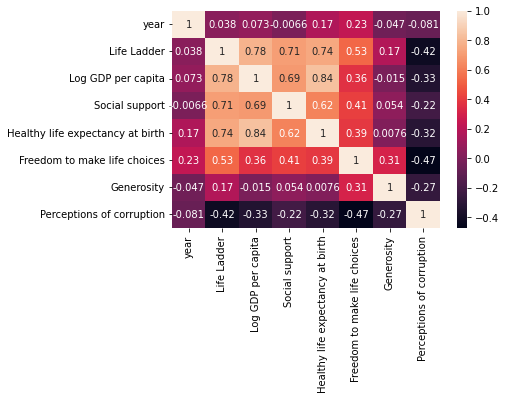

In [87]:
import seaborn as sns

pd.set_option('display.max_colwidth',700)
df_5 = pd.read_excel('../input/world-happ/world-happiness-report-2005-2021 (1).xlsx')

sns.heatmap(df_5.corr(),annot=True)

## Regression

In [89]:
df_2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [91]:
df_2 = pd.get_dummies(df_2, prefix=['Country name'])
df_2.shape

(1949, 174)

In [104]:
df_2.dropna(inplace=True)

In [108]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
X = df_2.drop(['Life Ladder'],axis= 1)
y = df_2['Life Ladder']

X_train, X_test,y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

## Linear Regression

In [106]:
df_2.isnull().sum()

year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
                                   ..
Country name_Venezuela              0
Country name_Vietnam                0
Country name_Yemen                  0
Country name_Zambia                 0
Country name_Zimbabwe               0
Length: 174, dtype: int64

In [109]:
regressor = LassoCV(cv=5, random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')


Mean absolute error: 0.43
Mean squared error: 0.30
Root mean squared error: 0.55


## Decision Trees

In [110]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.36
Mean squared error: 0.24
Root mean squared error: 0.49


## Random Forest

In [111]:
regressor = RandomForestRegressor(n_estimators=200)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.27
Mean squared error: 0.13
Root mean squared error: 0.36


In [112]:
importances = regressor.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df_2.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Healthy life expectancy at birth 0.405372
 2) Log GDP per capita             0.341392
 3) Social support                 0.072139
 4) Freedom to make life choices   0.046999
 5) Perceptions of corruption      0.028802
 6) Generosity                     0.026958
 7) Life Ladder                    0.014286
 8) Country name_Sri Lanka         0.009657
 9) Country name_Bulgaria          0.004464
10) Country name_Mexico            0.004234
11) Country name_Brazil            0.003334
12) Country name_Syria             0.003012
13) Country name_Costa Rica        0.002645
14) Country name_El Salvador       0.002410
15) Country name_Guatemala         0.002235
16) Country name_Venezuela         0.001835
17) Country name_Dominican Republic 0.001595
18) Country name_Botswana          0.001525
19) Country name_Panama            0.001360
20) Country name_Portugal          0.001169
21) Country name_Israel            0.001147
22) Country name_Colombia          0.001129
23) Country name_Zimbabwe    

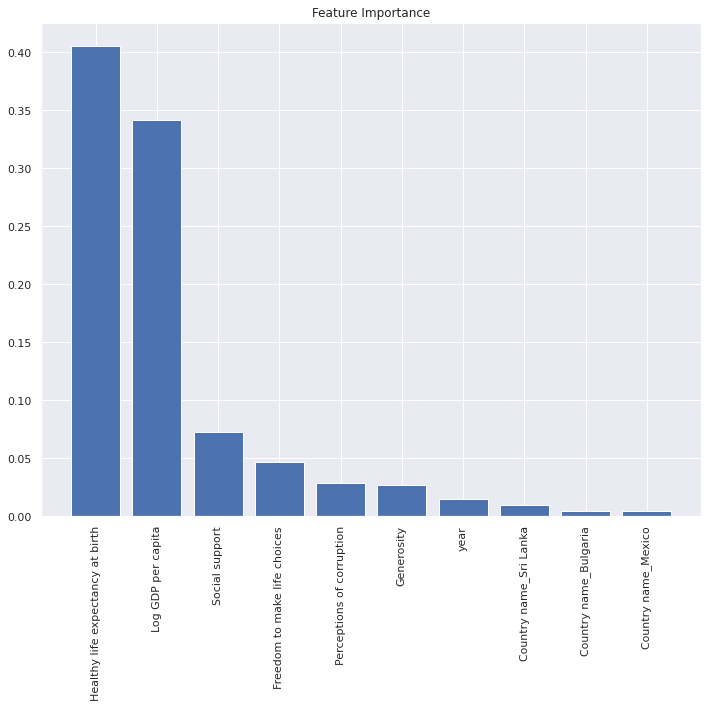

In [116]:
sns.set(rc={'figure.figsize':(10,10)})

plt.title('Feature Importance')
plt.bar(range(10), importances[sorted_indices][:10], align='center')
plt.xticks(range(10), X_train.columns[sorted_indices][:10], rotation=90)
plt.tight_layout()
plt.show()

**We can see that Healthy Life Expectancy and Log GDP per capita are two of the most important features for Ladder score ( happiness score )**